In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import netCDF4 as nc
import datetime
from netCDF4 import num2date, date2num
pd.options.display.max_rows=6

In [20]:
airanom=nc.Dataset('./dataset/question3/3-1/air.mon.anom.nc')
airanom.variables.keys()

dict_keys(['lat', 'lon', 'time', 'time_bnds', 'air'])

In [49]:
airanom

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    Source: ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/
    dataset_title: NOAA Global Surface Temperature (NOAAGlobalTemp)
    References: https://www.esrl.noaa.gov/psd/data/gridded/data.noaaglobaltemp.html
    keywords_vocabulary: Climate and Forecast (CF) Standard Name Table (Version 46, 25 July 2017)
    keywords: Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature, Earth Science > Atmosphere > Atmospheric Temperature > Surface Temperature > Air Temperature
    cdm_data_type: Grid
    dataset_citation_url: https://doi.org/10.25921/9qth-2p70
    references: Vose, R. S., et al., 2012: NOAAs merged land-ocean surface temperature analysis. Bulletin of the American Meteorological Society, 93, 1677-1685. doi: 10.1175/BAMS-D-11-00241.1. Huang, B., Peter W. Thorne, et. al, 2017: Extended Reconstructed Sea Surface Temperature version 5 (ERSS

In [46]:
atime=airanom['time']
alat=airanom['lat'][:]
alon=airanom['lon'][:]
airdata=airanom['air']
len(atime)

1674

In [47]:
time=[]
for t in range(len(atime)):
    time.append(int(str(num2date(atime[t],units=atime.units))[0:4]))
ayears=list(set(time))

In [48]:
airdata

<class 'netCDF4._netCDF4.Variable'>
float32 air(time, lat, lon)
    var_desc: Air Temperature
    level_desc: Surface
    statistic: Anomaly
    parent_stat: Observation
    valid_range: [-40.  40.]
    units: degC
    missing_value: -9.96921e+36
    long_name: Surface Air Temperature and SST Monthly Anomaly
    precision: 2
    cell_methods: time: anomaly (monthly from values)
    standard_name: air_temperature_anomaly
    dataset: NOAA Global Temperature
    actual_range: [-20.1062  20.03  ]
    date_of_file_acquired: 2019-9-16
unlimited dimensions: time
current shape = (1674, 36, 72)
filling on, default _FillValue of 9.969209968386869e+36 used

In [54]:
air_m_g_mean=[]
for t in range(1674):
    air_m_g_mean.append(airdata[t].mean())
print(len(air_m_g_mean))
air_m_g_mean=pd.DataFrame(air_m_g_mean)

1674


In [165]:
temp=[]
for i in range(140):
    temp.append(air_m_g_mean[i:i+12].mean())
air_m_g_mean=pd.DataFrame(temp,index=ayears)
air_m_g_mean[69:-1]

,0
1949,-0.534342
1950,-0.524670
1951,-0.514674
1952,-0.504573
1953,-0.494614
...,...
2014,-0.593492
2015,-0.594141
2016,-0.594839
2017,-0.595607


In [175]:
data=pd.read_table('./dataset/question3/3-1/ernino.txt',sep=' ')
data[:]
data[:].to_csv('./dataset/ernino.csv')

In [195]:
indexlist=list(data['1948'])
#indexlist

In [196]:
del data['1948']

In [197]:
data.index=indexlist

In [198]:
data=pd.DataFrame(data.mean(1))
data=data.rename(columns={0:'ernimo'})
data

,ernimo
1949,0.049455
1950,0.536455
1951,1.218000
1952,-0.431000
1953,0.130818
...,...
2014,-1.262909
2015,-1.047636
2016,-0.823455
2017,-0.451273


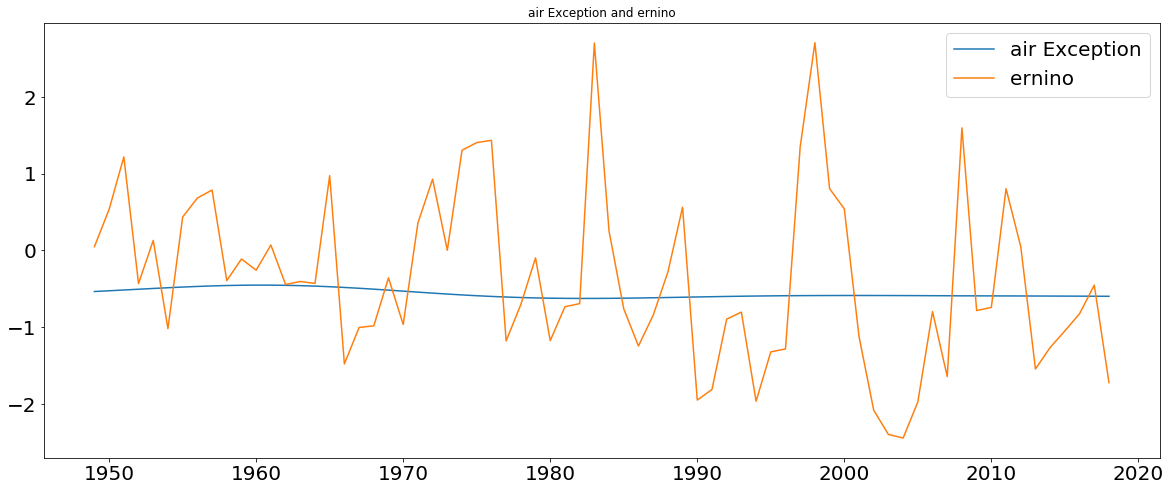

In [199]:
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
ax.set_title('air Exception and ernino')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.plot(air_m_g_mean[69:-1],label='air Exception')
ax.plot(data,label='ernino ')
ax.legend(fontsize=20)

In [200]:
GLBdata=pd.read_csv('./dataset/question3/3-1/GLB.Ts+dSST.csv',skiprows=[1])

In [218]:
years=GLBdata['Land-Ocean: Global Means']
years

0     1948
1     1949
2     1950
3     1951
4     1952
      ... 
67    2015
68    2016
69    2017
70    2018
71    2019
Name: Land-Ocean: Global Means, Length: 72, dtype: int64

In [223]:
glbdata=GLBdata['Unnamed: 19']
glbdata.index=years
glbdata

Land-Ocean: Global Means
1948   -0.108889
1949   -0.116667
1950   -0.176667
1951   -0.081667
1952    0.012222
          ...   
2015    0.893889
2016    1.026111
2017    0.925556
2018    0.852222
2019         NaN
Name: Unnamed: 19, Length: 72, dtype: float64

In [225]:
glb=pd.DataFrame(glbdata)[1:-1]
glb

,Unnamed: 19
Land-Ocean: Global Means,
1949,-0.116667
1950,-0.176667
1951,-0.081667
1952,0.012222
1953,0.074444
...,...
2014,0.746111
2015,0.893889
2016,1.026111


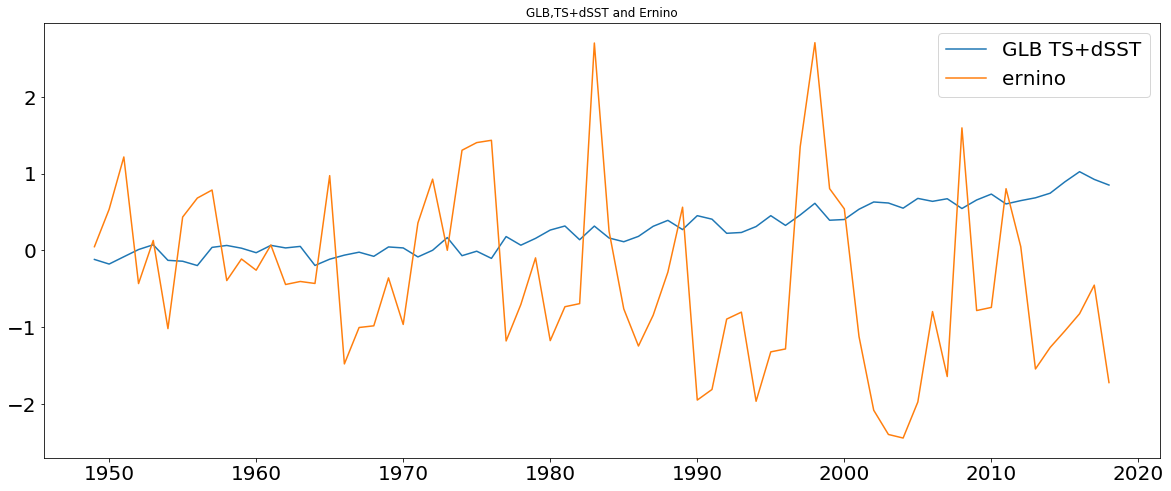

In [230]:
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
ax.set_title('GLB,TS+dSST and Ernino')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.plot(glb,label='GLB TS+dSST')
ax.plot(data,label='ernino ')
ax.legend(fontsize=20)